In [1]:
#!pip install -m tarfile -e archive.tar.gz

In [2]:
#import tarfile
#tar = tarfile.open("release_gp_homework_data.tar.gz")
#tar.extractall()
#tar.close()

In [263]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns


In [164]:
# Reading data
u_matrices, v_matrices = [], []
for t in range(1, 101):
    u_matrices.append(pd.read_csv(f'OceanFlow/{t}u.csv', header=None).values)
    v_matrices.append(pd.read_csv(f'OceanFlow/{t}v.csv', header=None).values)


In [5]:
# Create a 3-dimensional array to aggregate the two matrices
vel_u = np.stack(u_matrices, axis=2)
vel_v = np.stack(v_matrices, axis=2)

# Defining velocity vector
vel = (vel_u**2 + vel_v**2)**0.5

print(f"Shape vel_u: {vel_u.shape}")
print(f"Shape vel_u: {vel_v.shape}")
print(f"Shape vel: {vel.shape}")

Shape vel_u: (504, 555, 100)
Shape vel_u: (504, 555, 100)
Shape vel: (504, 555, 100)


In [39]:
h_vals = list(range(vel_u.shape[1]))
v_vals = list(range(vel_u.shape[0]))

# Defining the number of iterations
iterations = 1000000

# Calculating max correlation
max_corr = 0

# Initializing dictionary
corr_u_dict, corr_v_dict, corr_w_dict, corr_d_dict = {}, {}, {}, {}

# Running through all iterations
for iteration in range(iterations):

    # First location
    h1 = np.random.choice(a=h_vals, size=1)
    v1 = np.random.choice(a=v_vals, size=1)

    # Second location
    h2 = np.random.choice(a=h_vals, size=1)
    v2 = np.random.choice(a=v_vals, size=1)

    # If the sums are greater than zero
    if np.sum(vel_u[v1, h1]) > 0 and np.sum(vel_u[v2, h2]) > 0 and np.sum(vel_v[v1, h1]) > 0 and np.sum(vel_v[v2, h2]) > 0:
        
        if v1 != v2 and h1 != h2:

            # Calculating correlation
            corr_u_dict[f"({h1}, {v1}) x ({h2}, {v2})"] = np.corrcoef(vel_u[v1, h1], vel_u[v2, h2])[0][1]
            corr_v_dict[f"({h1}, {v1}) x ({h2}, {v2})"] = np.corrcoef(vel_v[v1, h1], vel_v[v2, h2])[0][1]
            corr_d_dict[f"({h1}, {v1}) x ({h2}, {v2})"] = ((9*(h1-h2)**2 + 9*(v1-v2)**2)**0.5/(9*(vel_u.shape[1]**2 + vel_u.shape[0]**2)**0.5))[0]
            corr_w_dict[f"({h1}, {v1}) x ({h2}, {v2})"] = corr_u_dict[f"({h1}, {v1}) x ({h2}, {v2})"]*corr_v_dict[f"({h1}, {v1}) x ({h2}, {v2})"]


In [44]:
max_corr = 0

for item in corr_w_dict:

    if max_corr < np.abs(corr_w_dict[item]) and corr_d_dict[item] > 0.25:

        max_corr = np.abs(corr_w_dict[item])
        max_item = item

        print(f"{item} | {max_corr} | {corr_d_dict[item]}")


([14], [255]) x ([547], [14]) | 0.09070586302813322 | 0.2600852429082998
([180], [492]) x ([541], [5]) | 0.13950714263426647 | 0.2695364531970135
([527], [11]) x ([25], [421]) | 0.6088266716402718 | 0.2881861828992968
([24], [431]) x ([544], [23]) | 0.6429827925993163 | 0.2938785411831152
([524], [13]) x ([40], [426]) | 0.6464605427162265 | 0.2828970434280015
([35], [435]) x ([513], [14]) | 0.6558597522935932 | 0.28321133477179206


In [94]:
# Initializing dictionary
corr_matrix_u = np.zeros(vel_u[:,:,0].shape)
corr_matrix_v = np.zeros(vel_v[:,:,0].shape)

vel = (vel_u**2 + vel_v**2)**0.5
corr_matrix_vel = np.zeros(vel[:,:,0].shape)

# Running through all iterations
for h in range(vel_u.shape[1]):
    for v in range(vel_u.shape[0]):

        if np.sum(vel_u[v, h]) == 0:
            corr_matrix_u[v,h] = 0
        else:
            corr_matrix_u[v,h] = np.corrcoef(vel_u[435, 35], vel_u[v, h])[0][1]
        
        if np.sum(vel_v[v, h]) == 0:
            corr_matrix_v[v,h] = 0
        else:
            corr_matrix_v[v,h] = np.corrcoef(vel_v[435, 35], vel_v[v, h])[0][1]

        if np.sum(vel[v, h]) == 0:
            corr_matrix_vel[v,h] = 0
        else:
            corr_matrix_vel[v,h] = np.corrcoef(vel[435, 35], vel[v, h])[0][1]


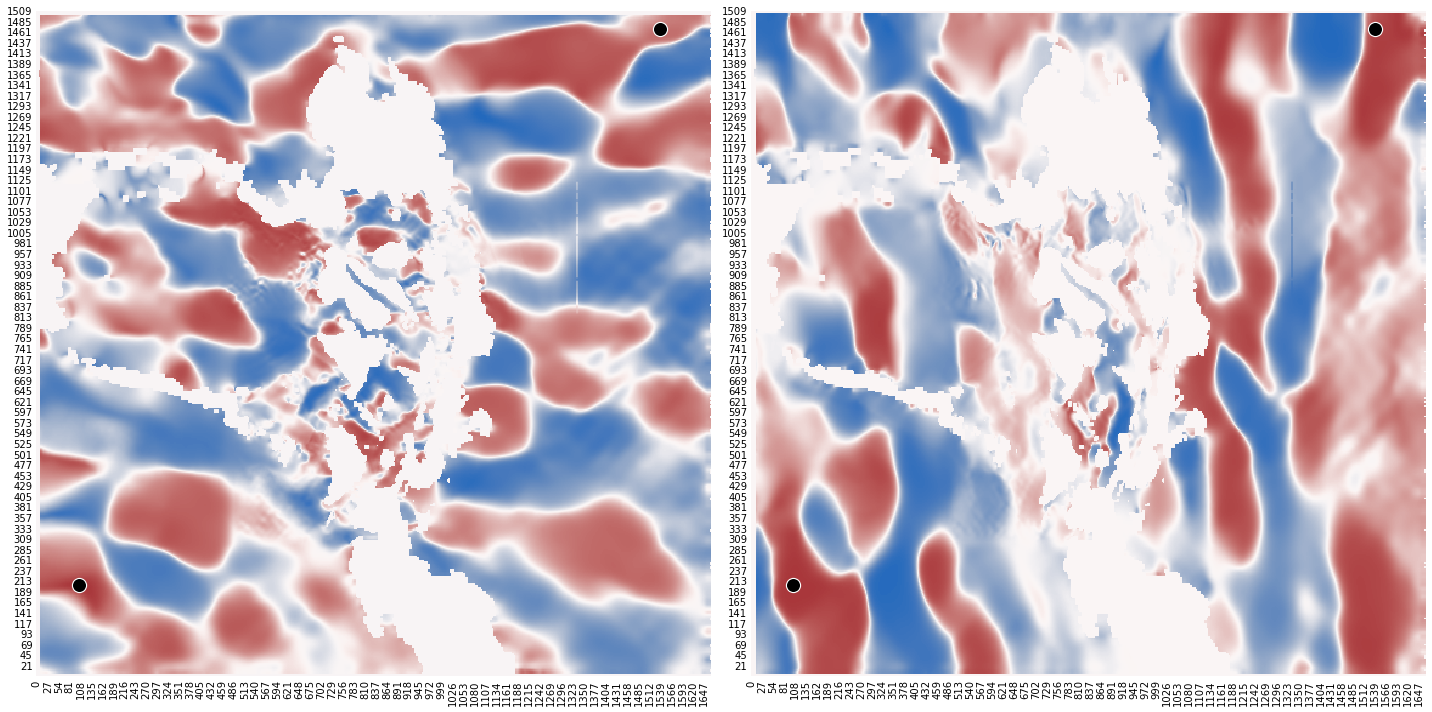

In [116]:
# Creating the first CDF plot
plt.figure(figsize=(20, 10))  # Set the figure size

plt.subplot(121)  # Create a subplot on the left
sns.heatmap(pd.DataFrame(corr_matrix_u, columns=[3*v for v in range(555)], index=[503*3 - 3*v for v in range(504)]), cmap=sns.color_palette("vlag", as_cmap=True), cbar=False)
sns.scatterplot(x=[35], y=[435], s=200, color='black')
sns.scatterplot(x=[513], y=[14], s=200, color='black')

# Creating the second CDF plot
plt.subplot(122)  # Create a subplot on the right
sns.heatmap(pd.DataFrame(corr_matrix_v, columns=[3*v for v in range(555)], index=[503*3 - 3*v for v in range(504)]), cmap=sns.color_palette("vlag", as_cmap=True), cbar=False)
sns.scatterplot(x=[35], y=[435], s=200, color='black')
sns.scatterplot(x=[513], y=[14], s=200, color='black')

# Adjust layout
plt.tight_layout()

# Displaying the plots
plt.show()


In [270]:
# Listing Positions
h_vals = list(range(vel_u.shape[1]))
v_vals = list(range(vel_u.shape[0]))

# Initializing particles
particles = {}

# Setting the number of particles
n_particles = 90

# Running through all iterations
for n_i, p_i in enumerate(range(n_particles)):

    # First location
    h = np.random.choice(a=h_vals, size=1)[0]*3
    v = np.random.choice(a=v_vals, size=1)[0]*3

    particles[n_i+1] = {'h':[h], 'v':[v]}


# Initializing run flag
run = True

# Defining time discretization
dt = 0.01

# Initializing time
t_run = 0

# Initializing time index
T = 0

# Listing horizontal and vertical positions
h_ind = np.arange(vel_u.shape[1])
v_ind = np.arange(vel_v.shape[1])

# Reuning while run = True
while run:

    # Iterating through all particles
    for particle in particles:

        # Calculating current coordinates
        h_coord = np.max(h_ind[particles[particle]['h'][-1] > h_ind*3])
        v_coord = np.max(v_ind[particles[particle]['v'][-1] > v_ind*3])
        
        # Calculating current velocity
        u_comp = vel_u[v_coord, h_coord, T]
        v_comp = vel_v[v_coord, h_coord, T]

        # Calculating current position
        h_new = u_comp*dt + particles[particle]['h'][-1]
        v_new = v_comp*dt + particles[particle]['v'][-1]

        # Calculating current position
        particles[particle]['h'].append(h_new)
        particles[particle]['v'].append(v_new)

    # Updating run time
    t_run += dt

    # Calculating time position
    T = int(t_run)

    # Checking if the code has run the 300 hours
    if(t_run > 99):
        run = False

In [236]:
# x_list = []
# y_list = []

# vel_mu = np.mean(vel, axis=2)

# # Running through all iterations
# for h in range(vel_u.shape[1]):
#     for v in range(vel_u.shape[0]):

#         if vel_mu[v,h] == 0:
#             if h in [0, 1, 2, 554] or v in [0, 1, 503]:
#                 pass
#             else:
#                 x_list.append(h)
#                 y_list.append(v)

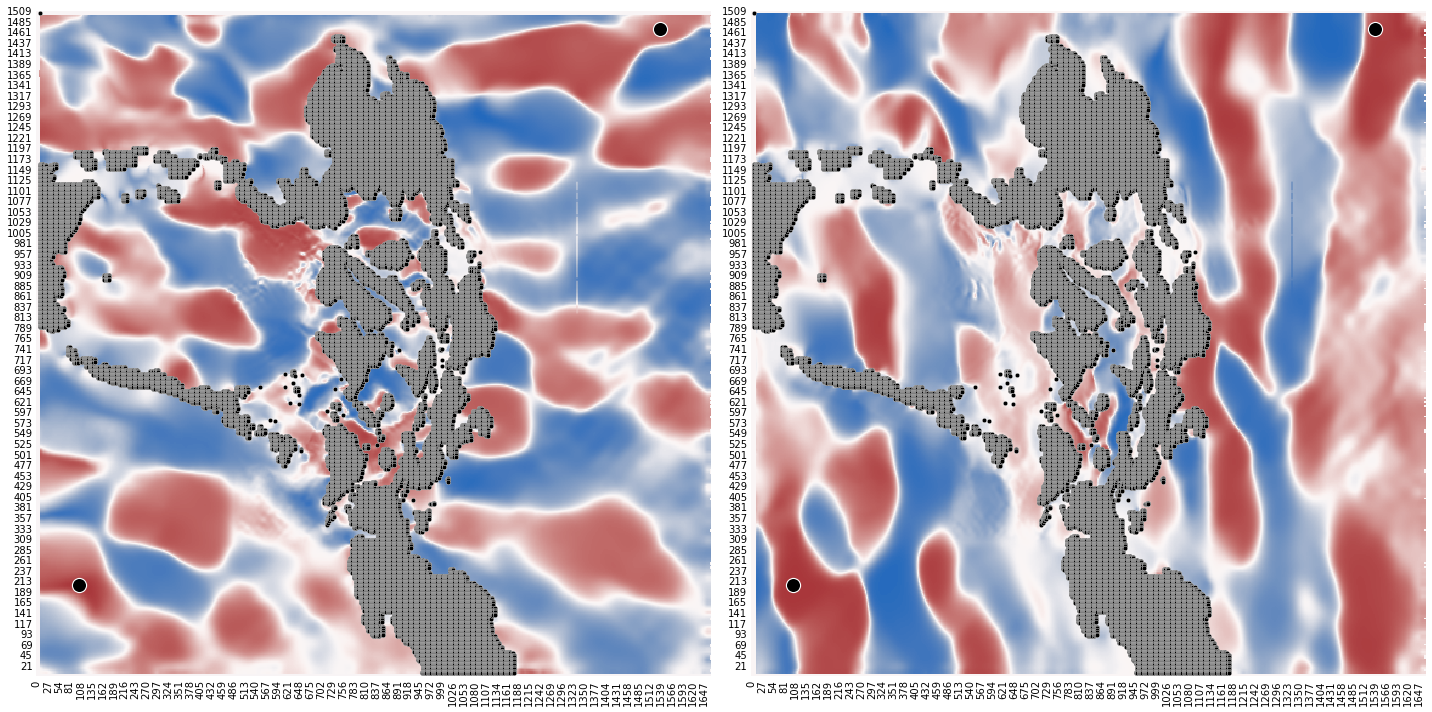

In [239]:
# Creating the first CDF plot
plt.figure(figsize=(20, 10))  # Set the figure size

plt.subplot(121)  # Create a subplot on the left
sns.heatmap(pd.DataFrame(corr_matrix_u, columns=[3*v for v in range(555)], index=[503*3 - 3*v for v in range(504)]), cmap=sns.color_palette("vlag", as_cmap=True), cbar=False)
sns.scatterplot(x=[35], y=[435], s=200, color='black')
sns.scatterplot(x=[513], y=[14], s=200, color='black')
sns.scatterplot(x=x_list, y=y_list, s=20, color='black')

# Creating the second CDF plot
plt.subplot(122)  # Create a subplot on the right
sns.heatmap(pd.DataFrame(corr_matrix_v, columns=[3*v for v in range(555)], index=[503*3 - 3*v for v in range(504)]), cmap=sns.color_palette("vlag", as_cmap=True), cbar=False)
sns.scatterplot(x=[35], y=[435], s=200, color='black')
sns.scatterplot(x=[513], y=[14], s=200, color='black')
sns.scatterplot(x=x_list, y=y_list, s=20, color='black')

# Adjust layout
plt.tight_layout()

# Displaying the plots
plt.show()


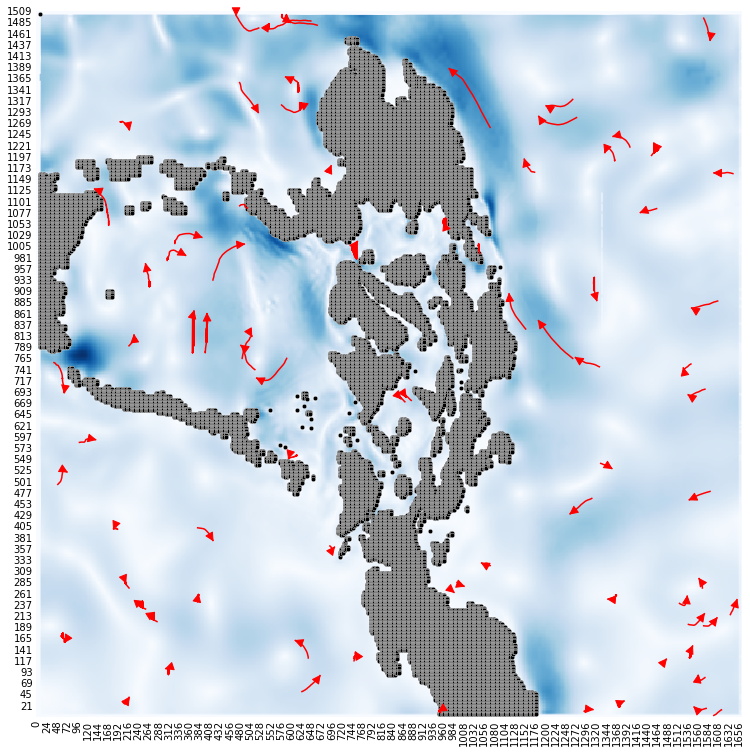

In [271]:
# Creating the first CDF plot
plt.figure(figsize=(10, 10))  # Set the figure size

sns.heatmap(pd.DataFrame(vel[:,:,0], columns=[3*v for v in range(555)], index=[503*3 - 3*v for v in range(504)]), cmap=sns.color_palette("Blues", as_cmap=True), cbar=False)
sns.scatterplot(x=x_list, y=y_list, s=20, color='black')

for p_i in particles:

    sns.lineplot(x=np.array(particles[p_i]['h'])/3, y=np.array(particles[p_i]['v'])/3, color='red')
    plt.annotate(
        '',
        xy=((1/3)*np.array(particles[p_i]['h'])[-1], (1/3)*np.array(particles[p_i]['v'])[-1]),  # Arrow tail location (2nd last data point)
        xytext=((1/3)*np.array(particles[p_i]['h'])[-2], (1/3)*np.array(particles[p_i]['v'])[-2]),  # Arrow head location (last data point)
        arrowprops=dict(color='red', arrowstyle='simple, head_width=0.75, head_length=0.75')
    )

# Displaying the plots
plt.show()


In [286]:
import random

# Function to generate a random color
def random_color():
    r = random.randint(0, 255)  # Random red component
    g = random.randint(0, 255)  # Random green component
    b = random.randint(0, 255)  # Random blue component
    return (r, g, b)

# Generate a list of 90 random colors
random_colors = [random_color() for _ in range(90)]

# List of previously generated random colors
random_colors = [('#%02x%02x%02x' % color) for color in random_colors]  # Convert RGB tuples to hex color strings

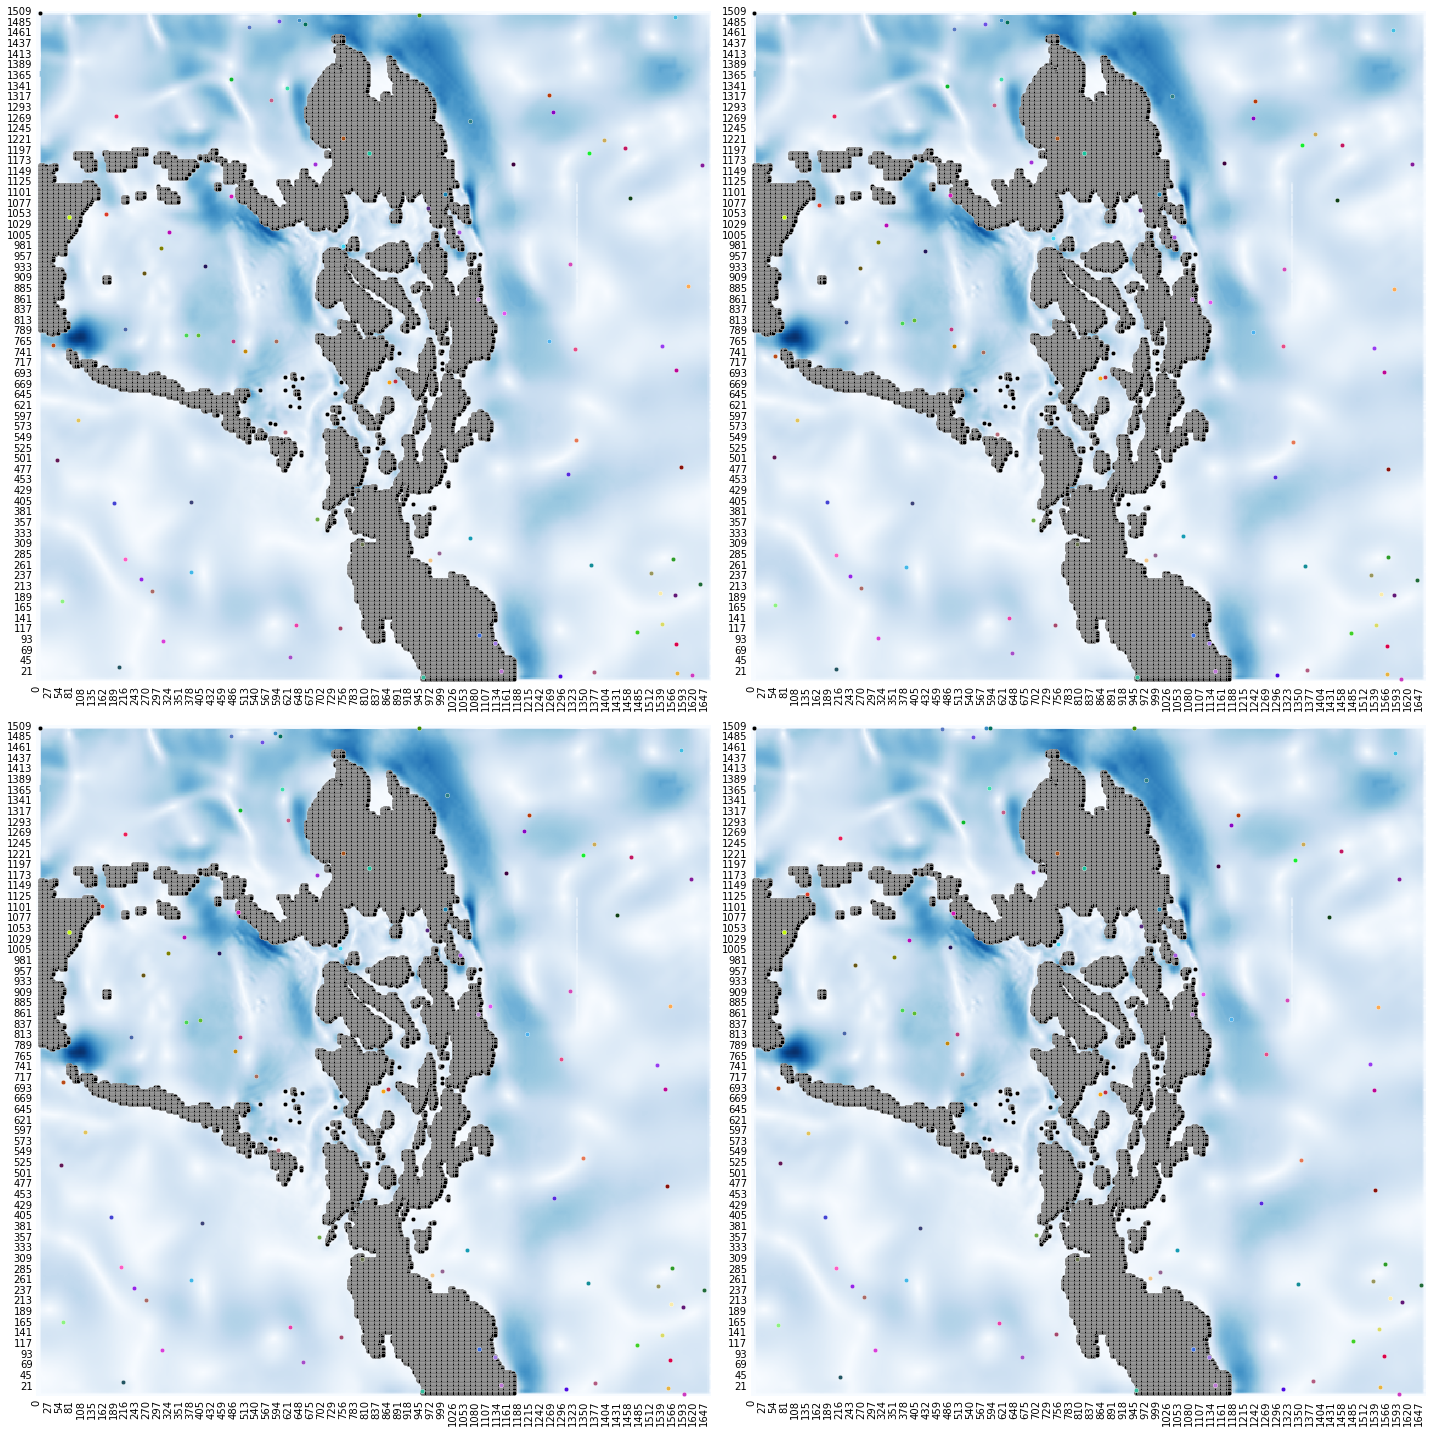

In [287]:
# Creating the first CDF plot
plt.figure(figsize=(20, 20))  # Set the figure size

plt.subplot(221)  # Create a subplot on the left
sns.heatmap(pd.DataFrame(vel[:,:,0], columns=[3*v for v in range(555)], index=[503*3 - 3*v for v in range(504)]), cmap=sns.color_palette("Blues", as_cmap=True), cbar=False)
sns.scatterplot(x=x_list, y=y_list, s=20, color='black')
for i, p_i in enumerate(particles):
    sns.scatterplot(x=[(1/3)*np.array(particles[p_i]['h'])[0]], y=[(1/3)*np.array(particles[p_i]['v'])[0]], s=20, color=random_colors[i])

# Creating the second CDF plot
plt.subplot(222)  # Create a subplot on the right
sns.heatmap(pd.DataFrame(vel[:,:,0], columns=[3*v for v in range(555)], index=[503*3 - 3*v for v in range(504)]), cmap=sns.color_palette("Blues", as_cmap=True), cbar=False)
sns.scatterplot(x=x_list, y=y_list, s=20, color='black')
for i, p_i in enumerate(particles):
    sns.scatterplot(x=[(1/3)*np.array(particles[p_i]['h'])[3300]], y=[(1/3)*np.array(particles[p_i]['v'])[3300]], s=20, color=random_colors[i])

plt.subplot(223)  # Create a subplot on the left
sns.heatmap(pd.DataFrame(vel[:,:,0], columns=[3*v for v in range(555)], index=[503*3 - 3*v for v in range(504)]), cmap=sns.color_palette("Blues", as_cmap=True), cbar=False)
sns.scatterplot(x=x_list, y=y_list, s=20, color='black')
for i, p_i in enumerate(particles):
    sns.scatterplot(x=[(1/3)*np.array(particles[p_i]['h'])[6600]], y=[(1/3)*np.array(particles[p_i]['v'])[6600]], s=20, color=random_colors[i])

# Creating the second CDF plot
plt.subplot(224)  # Create a subplot on the right
sns.heatmap(pd.DataFrame(vel[:,:,0], columns=[3*v for v in range(555)], index=[503*3 - 3*v for v in range(504)]), cmap=sns.color_palette("Blues", as_cmap=True), cbar=False)
sns.scatterplot(x=x_list, y=y_list, s=20, color='black')
for i, p_i in enumerate(particles):
    sns.scatterplot(x=[(1/3)*np.array(particles[p_i]['h'])[9900]], y=[(1/3)*np.array(particles[p_i]['v'])[9900]], s=20, color=random_colors[i])

# Adjust layout
plt.tight_layout()

# Displaying the plots
plt.show()

In [ ]:
val = np.array(
    [0.82, 0.86, 0.91, 0.88, 0.83, 0.85, 0.88, 0.88, 0.93, 0.88, 0.84, 0.87, 0.88, 0.87, 0.85, 0.89, 0.89, 0.88, 0.86, 0.79, 0.82, 0.83, 0.91, 0.89, 0.89, 0.88, 0.86, 0.87, 0.86, 0.87]
)